In [1]:
import solar.python.angles as a
from datetime import date, time, datetime, timedelta
import pandas as pd
import itertools

In [52]:
o = a.portland()
columns = ['date_time', 'date', 'time', 'altitude', 'azimuth', 'south', 'west']
def slap(flea):
    if flea == 1:
        count, table = a.compute_table(o, date(2020,3,21),date(2020,9,21),time(5,0,0),time(21,0,0))
        a.print_table(o, count, table)
    if flea == 2:
        args = [[34, 0, 25, 0],[68,180,25,0],[34, 90, 25, 90],[68,270,25,90],[34, 180, 25, 180],[68,0,25,180]]
        print([a.compute_surface_incident_angle(*arg) for arg in args] == [9.0, 93.0, 9.0, 93.0, 9.0, 93.0])
    if flea == 3:
        angles = a.compute_angles_for_time_window(o, date(2020,6,21),date(2020,6,21),time(13,0,0),time(14,0,0),minutes=1)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
        print(data.size)
    if flea == 4:
        angles = a.compute_angles(o, datetime(2020,6,21,10), datetime(2020,6,21,14), minutes=5)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
    if flea == 5:
        angles = a.compute_angles_for_time_window(o, date(2020,1,21),date(2020,1,21),time(13,0,0),time(14,0,0),minutes=1,incline=46)
        data = pd.DataFrame(angles, columns=columns)
        print(data[['south', 'west']].sum())
  

In [2]:
a.portland()

********************** solar.python.angles


<ephem.Observer date='2021/1/5 02:29:00' epoch='2000/1/1 12:00:00' lon='-122:36:44.4' lat='45:30:07.6' elevation=100.00000000000001m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>

In [53]:
for flea in [1]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

+++++++++++++++++
flea: 1
+++++++++++++++++
location: 2827 SE 49th Avenue, Portland, Oregon lon: -122:36:44.4 lat: 45:30:07.6
count: 1244
python version:  3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) 
[Clang 6.0 (clang-600.0.57)]
03-21	07:11	RISE	88°
03-21	07:19	1°	E
03-21	10:57	36°	SE
03-21	13:17	45°	S
03-21	15:37	36°	SW
03-21	19:14	1°	W
03-21	19:23	SET	272°
03-22	07:09	RISE	88°
03-22	07:20	2°	E
03-22	10:57	36°	SE
03-22	13:17	46°	S
03-22	15:36	36°	SW
03-22	19:12	2°	W
03-22	19:24	SET	272°
03-23	07:07	RISE	87°
03-23	07:22	2°	E
03-23	10:58	36°	SE
03-23	13:17	46°	S
03-23	15:35	37°	SW
03-23	19:10	3°	W
03-23	19:25	SET	273°
03-24	07:05	RISE	87°
03-24	07:23	3°	E
03-24	10:58	37°	SE
03-24	13:16	46°	S
03-24	15:34	37°	SW
03-24	19:08	3°	W
03-24	19:27	SET	273°
03-25	07:03	RISE	86°
03-25	07:24	3°	E
03-25	10:59	37°	SE
03-25	13:16	47°	S
03-25	15:33	37°	SW
03-25	19:06	4°	W
03-25	19:28	SET	274°
03-26	07:02	RISE	86°
03-26	07:25	4°	E
03-26	11:00	38°	SE
03-26	13:16	47°	S
03-26	15:32	38°	SW
03-26	19:04	

In [54]:
d1,d2,t1,t2 = date(2020,2,1),date(2020,2,1),time(7,0,0),time(9,0,0)
d1,d2,t1,t2 = date(2020,1,1),date(2020,12,31),time(5,0,0),time(21,0,0)
d1,d2,t1,t2 = date(2020,6,21),date(2020,6,21),time(5,0,0),time(21,0,0)

d1,d2,t1,t2 = date(2020,2,21),date(2020,2,21),time(5,0,0),time(21,0,0)

minutes = 5

<AxesSubplot:xlabel='time'>

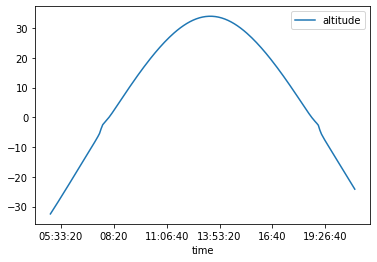

In [55]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=25)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
data[['time','altitude']].plot(x='time')

In [56]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=45)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    5826.822008
west     3288.250740
total    8786.247674
dtype: float64


In [57]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=65)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south     7207.078863
west      3733.148854
total    10566.912832
dtype: float64


In [58]:
count, table = a.compute_table(o, date(2020,6,21),date(2020,6,21),time(5,0,0),time(21,0,0))

In [59]:
print(count)
for x in table:
    print(x)

5
['06-21', '05:23', 'RISE', '55°']
['06-21', '08:53', '34°', 'E']
['06-21', '11:48', '62°', 'SE']
['06-21', '17:31', '34°', 'W']
['06-21', '21:00', 'SET', '305°']
